In [33]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [34]:
#based on a famous experiment by Karl Pearson around 1903
heights = Table().read_table('datasets/heights.csv')
heights

Father,Son
65,59.8
63.3,63.2
65,63.3
65.8,62.8
61.1,64.3
63,64.2
65.4,64.1
64.7,64
66.1,64.6
67,64


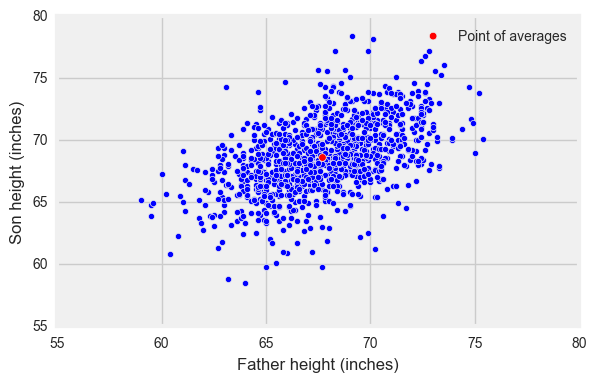

In [35]:
plt.scatter(heights.column(0), heights.column(1))
plt.scatter([np.mean(heights.column(0))], [np.mean(heights.column(1))], c='r',s=30, label='Point of averages')
plt.legend()
plt.xlabel('Father height (inches)')
plt.ylabel('Son height (inches)')

__dependent variable__: the variable we are trying to predict (e.g. heights of sons)

__independent variable__: the predictor variable (e.g. heights of fathers) 

**The data seem to cluster around a straight line. But how can we quantify that? Correlation!**

**Correlation** is a measure of **linear association** between two variables. It measures how well points cluster around a straight line.

## Standard Units

Is it possible to take a distribution and transform it into a new one with MEAN = 0 and SD = 1? Yes! Convert to standard units!

Let x be a list of numbers. To put that list in standard units.

$$\large x^* = \frac{x - \bar{x}}{\sigma_x}$$

where 


$x^*$ is our new list in SU
 
$\bar{x}$ is the average of x

$\sigma_x$ is the standard deviation of x

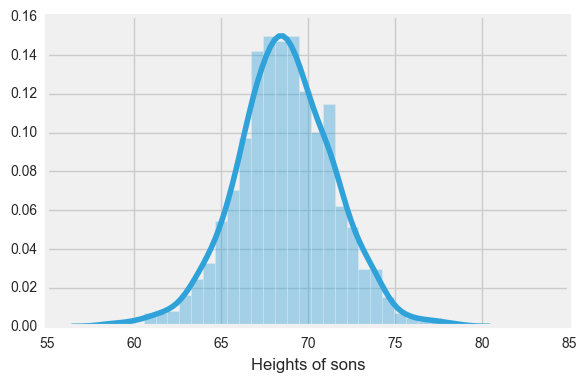

In [26]:
#example look at the heights of sons

sons = heights.column(1)
sns.distplot(sons)
plt.xlabel('Heights of sons')

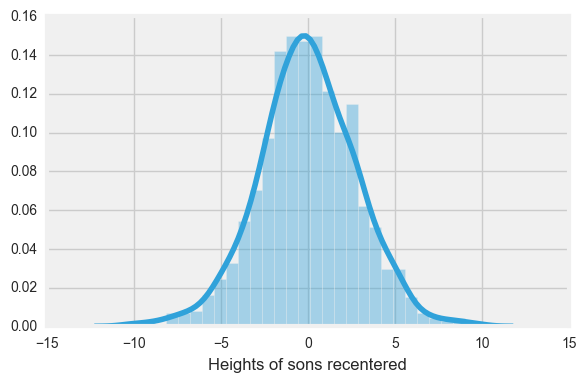

In [27]:
#Step 1: Shift the distribution to be centered around 0 
sons_recentered = 
s)
sns.distplot(sons_recentered)
plt.xlabel('Heights of sons recentered')

Mean is: -0.0
SD is: 1.0


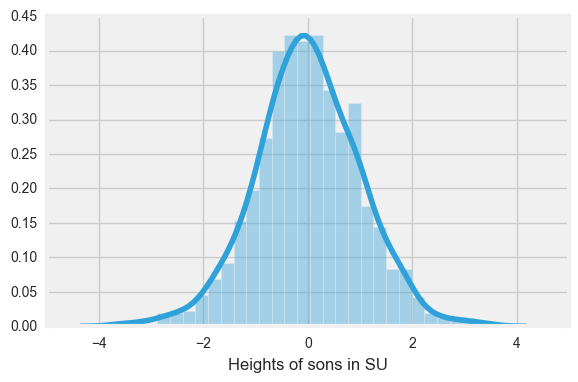

In [28]:
# Step 2: Shrink the distribution to have a SD of 1
sons_su = sons_recentered/np.std(sons)
sns.distplot(sons_su)
plt.xlabel('Heights of sons in SU')
#Proof
print("Mean is:", round(np.mean(sons_su)))
print("SD is:", np.std(sons_su))

**Correlation**: Slope of the best fit line when both variables are converted to SU.


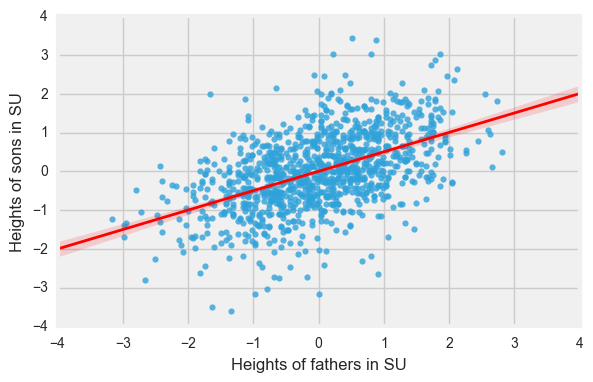

In [29]:
fathers = heights.column(0)
fathers_su = (fathers - np.mean(fathers))/np.std(fathers)
sns.regplot(fathers_su, sons_su, line_kws={'color':'red', 'linewidth':2})
plt.xlabel("Heights of fathers in SU")
plt.ylabel("Heights of sons in SU")

## Correlation is the slope of best fit line in Standard Units

**Correlation coefficient**$(\rho)$**:** $$\large -1 \leq \rho = np.mean(x^* y^*) \leq 1 $$

OR 

$\bar{x} =$ x list in SU

$\bar{y} =$ y list in SU

**Correlation has no units. It is a pure number**

In your regular diagram, a change of one SD on the x axis produces a change of $\rho SD_y$ on the y. 

## Factors that do not affect correlation

1. __Scaling variables__ (conversion to SU)
2. __Adding constants__ to variables (conversion to SU)
3. __Switching x and y__ (symmetrical formula for $\rho$) But the regression line will be different!

## Important points to remember

1. Correlation is really affected by outliers
2. Correlation measures **linear** association

### Warning: Ecological Correlation

There term ecologicalcorrelation refers to the practice of finding the correlation between aggregates of the original population. This practice tends to \underline{over represent} correlation. In general averages tend to exhibit higher correlations. Example: Average SAT scores of States correlated with the average performance of ACT. States do not take exams, students do, find $\rho$ in the actual population, not its aggregates.

### Regression Line

**Underlying model:** $\large y = slope \times x + intercept$

**Slope** =  $\large \rho \frac{SD_y}{SD_x}$

**Intercept** = $\large \bar{y} - slope \times \bar{x}$

In [30]:
def reg(x,y):
    """Returns slope and intercept"""
    mx = np.mean(x)
    my = np.mean(y)
    sdx = np.std(x)
    sdy = np.std(y)
    
    x_su = (x - mx)/sdx
    y_su = (y - my)/sdy
    
    rho = np.mean(x_su*y_su)
    
    slope = rho * (sdy/sdx)
    intercept = my - mx*slope
    return slope, intercept

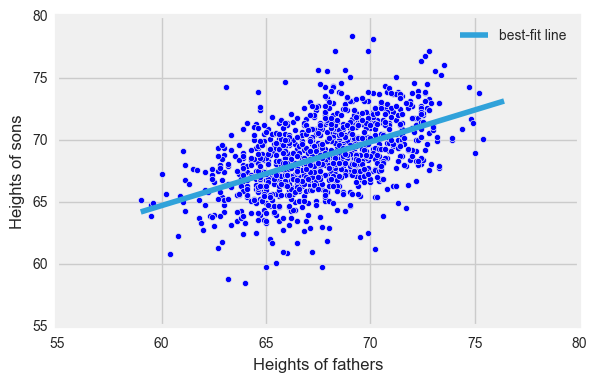

In [31]:
a, b = reg(fathers, sons)
x = np.linspace(min(fathers), max(fathers)+1, 10)
y_hat = a*x+b
plt.scatter(fathers, sons)
plt.xlabel("Heights of fathers")
plt.ylabel("Heights of sons")
plt.plot(x, y_hat, label='best-fit line')
plt.legend()

### Regression to the mean

The  phenomenon  that  if  a  particular  point is  far  away  from  the  average  in  some  dimension,  then  it  will  be comparatively  closer  to  the  average  in  some  other.   This  explains why in the SD line, we tend to see that for values way above average most points are below the line and for points below average, mostpoints are above.

**Example midterm vs final grades**

The regression effect is that if you did badly in the midterm exam, it is more likely that you will perform closer to the mean in the final. Fir example, if a student finishes in the bottom 10% of the class for MT1 chances are that he will do comparatively better in the final.

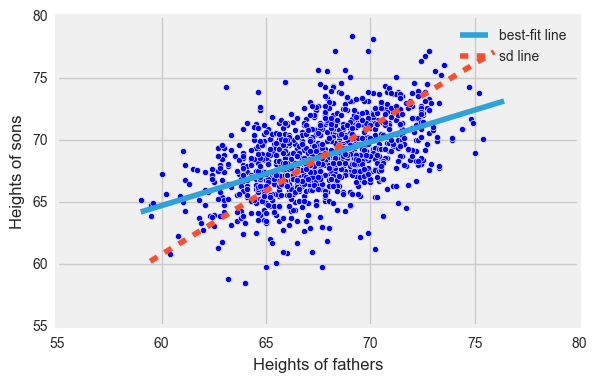

In [32]:
#The SD line goes through points that are an equal number of SDs away average.
# For example it goes through points they are the same number of SDs away from their mean
# You don't have to know about the SD line for ths class but it is a nice way of seeing the regression effect
a, b = reg(fathers, sons)
x = np.linspace(min(fathers), max(fathers)+1, 10)
y_hat = a*x+b
plt.scatter(fathers, sons)
plt.xlabel("Heights of fathers")
plt.ylabel("Heights of sons")
plt.plot(x, y_hat, label='best-fit line')
plt.plot(np.arange(-3,4)*np.std(fathers)+np.mean(fathers), np.arange(-3,4)*np.std(sons)+np.mean(sons), 
         label = 'sd line', linestyle='--') # my SD line goes through points that are the same number of SDs away from
                                            # the mean in the x and y directions
plt.legend()

## Exercise

![alt text](question.png )



## Question: What's Steph Curry’s points per game in standard units? 

## Question: What is the slope of the regression line in points/minute?

## Question: What's the fitted value for Steph Curry using this regression line to estimate his points per game from his minutes played per game? 

## Question: Why is the fitted value so much lower than the actual value of __?!?
